In [ ]:
# Import all necessary libraries
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [ ]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

### Informações do exemplo

A **função objetivo** do exemplo é dada por

$$y = a_1 x_1 + a_2 x_2, \text{(equação de um plano)}$$

onde $a_1=2$ e $a_2=2$.

A **função hipótese** que iremos usar tem o seguinte formato

$$h(x) = \hat{a}_1 x_1 + \hat{a}_2 x_2, \text{(equação de um plano)}$$

onde $\hat{a}_1$ e $\hat{a}_2$ são os parâmetros (ou seja, os pesos) que queremos encontrar.

A função do **erro quadrático médio** para essa **função hipótese** é dada por

$$J_{e}(\textbf{a})= \frac{1}{N}\sum_{n=0}^{N-1}{[ y(n) - (\hat{a}_1 x_1(n) + \hat{a}_2 x_2(n) )]^2}.$$

Cada **elemento** do **vetor gradiente** é dado por

$$\frac{\partial J_{e}(\textbf{a})}{\partial a_k} = -\frac{2}{N}\sum_{n=0}^{N-1}{[ y(n) - (\hat{a}_1 x_1(n) + \hat{a}_2 x_2(n) )]x_k(n)}, k = 1, 2.$$

O **vetor gradiente** em forma matricial é dado por

$$\frac{\partial J_{e}(\textbf{a})}{\partial \textbf{a}}= -\frac{2}{N}\textbf{X}^{T} (\textbf{y} - \hat{\textbf{y}} ), $$

onde $\textbf{X}$ é a matriz de atributos, com dimensão $N \times K$, $\textbf{y}$ é um vetor coluna com dimensão $N \times 1$ contendo todos os valores esperados e $\hat{\textbf{y}}$ é outro vetor coluna com dimensão $N \times 1$ contendo todas as saídas da função hipótese.

A **equação de atualização dos pesos** pode ser escrita em formato matricial como

$$\textbf{a} = \textbf{a} - \frac{\partial J_{e}(\textbf{a})}{\partial \textbf{a}} \\ \;\;\;\;\;\;\;\;= \textbf{a} + \alpha \textbf{X}^{T} (\textbf{y} - \hat{\textbf{y}} ).$$

**OBS. 1**: Por ser constante, o termo $2∕N$ pode ser absorvido pelo passo de aprendizagem, $\alpha$.

**OBS. 2**: Percebam que não temos peso de bias (ou intercept), $a_0$, e, portanto, não precisamos do atributo de bias, $x_0$, (valor sempre igual a 1).

### Definição de funções úteis

In [ ]:
def calculateErrorSurface(X, y):
    """Generate data points for plotting the error surface."""
    # Get the number of examples.
    N = len(y)

    # Generate values for parameters.
    M = 200
    a1 = np.linspace(-22.0, 24.0, M)
    a2 = np.linspace(-22.0, 24.0, M)
    # Generate the mesh grid.
    A1, A2 = np.meshgrid(a1, a2)

    # Get the attributes
    x1 = X[:,0].reshape(N, 1)
    x2 = X[:,1].reshape(N, 1)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            # Hypothesis function.
            yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2
            # Calculate the MSE.
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat))

    return J, A1, A2

def calculateClosedFormSolution(X, y):
    """Calculate closed-form solution using the normal equation."""
    # Get the number of examples.
    N = len(y)
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = X.dot(a_opt)
    Joptimum = (1.0/N)*np.sum(np.power((y - yhat), 2))

    return Joptimum, a_opt

def batchGradientDescent(X, y, alpha, maxNumIter):
    """Batch gradient descent solution."""
    # Get the number of examples.
    N = len(y)

    # Initialize error history with zeros.
    Jgd = np.zeros(maxNumIter+1)

    # Initialization of parameters (it is generally random).
    a = np.array([-20.0, -20.0]).reshape(2, 1)

    # Create matrix for parameter history.
    a_hist = np.zeros((2, maxNumIter+1))
    # Initialize history matrix.
    a_hist[:, 0] = a.reshape(2,)

    # Hypothesis function.
    yhat = X.dot(a)
    # Initial MSE.
    Jgd[0] = (1.0/N)*np.sum(np.power(y - yhat, 2))

    # Initialize gradient history matrix with zeros.
    grad_hist = np.zeros((2, maxNumIter))

    # Batch gradient-descent loop.
    error = 1
    iteration = 0
    while(error > 0.001 and iteration < maxNumIter-1):

        # Calculate the gradient vector.
        yhat = X.dot(a)
        gradients = -(2.0/N)*X.T.dot(y - yhat)

        # Update the weights.
        a = a - alpha * gradients

        # Store new weights into array.
        a_hist[:, iteration+1] = a.reshape(2,)

        # Calculate the MSE for the new weights.
        yhat = X.dot(a)
        Jgd[iteration+1] = (1.0/N)*sum(np.power((y - yhat), 2))

        # Calculate the error between subsequent iterations.
        error = np.abs(Jgd[iteration]-Jgd[iteration+1])

        # Update the gradient history.
        grad_hist[:, iteration] = gradients.reshape(2,)

        # Increment the iteration.
        iteration += 1

    return a, a_hist, Jgd, grad_hist, iteration

### Geração do conjunto de dados.

In [ ]:
# Number of pairs feature/label.
N = 10000

# Attributes.
x1 = 10.0*np.random.randn(N, 1)
x2 = 10.0*np.random.randn(N, 1)

# True function/model.
y = 2.0*x1 + 2.0*x2

# Noise.
w = np.sqrt(100.0)*np.random.randn(N, 1)

# Output values (targets).
y_noisy = y + w

### Visualizando o conjunto de dados observáveis

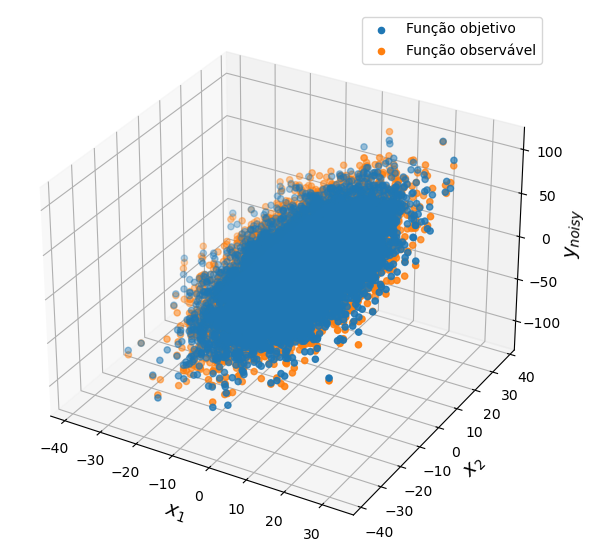

In [ ]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()

ax.scatter(x1, x2, y, label='Função objetivo')
ax.scatter(x1, x2, y_noisy, label='Função observável')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$y_{noisy}$', fontsize=14)
ax.legend()
plt.show()

### Plotando os histogramas normalizados de $x_1$ e $x_2$.

Perceba que os dois atributos têm intervalos de variação bastante similares, consequentemente, a superfíce de erro terá formato de tigela.

**OBS**.: Os histogramas abaixo estão normalizados, o que significa que são aproximações das FDPs de $x_1$ e $x_2$, as quais sabemos, seguem a distribuição Gaussiana.

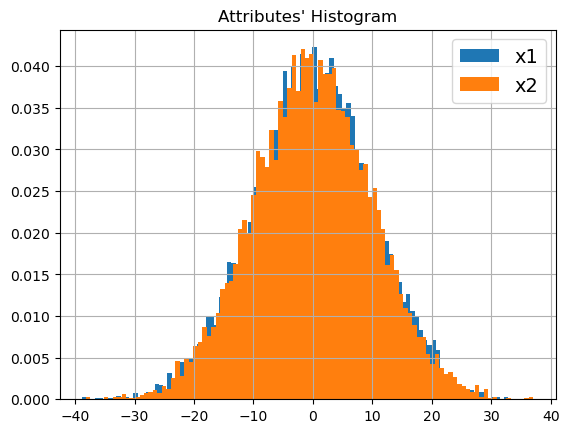

In [ ]:
plt.hist(x1, bins=100, density=True, label='x1')
plt.hist(x2, bins=100, density=True, label='x2')
plt.legend(fontsize=14)
plt.grid()
plt.title('Attributes\' Histogram')
plt.show()

### Criando a matriz de atributos

Para que possamos representar a **função hipótese em formato matricial** e, consequentemente, termos o **vetor gradiente em formato matricial também**, precisamos criar uma matriz de atributos que seja o resultado da concatenação dos dois vetores coluna, $x_1$ e $x_2$.

In [ ]:
# Concatena os vetores coluna x1 e x2, formando, assim, uma matriz de atributos com dimensões NxK.
X = np.c_[x1, x2]

### Plotando a superfície de erro

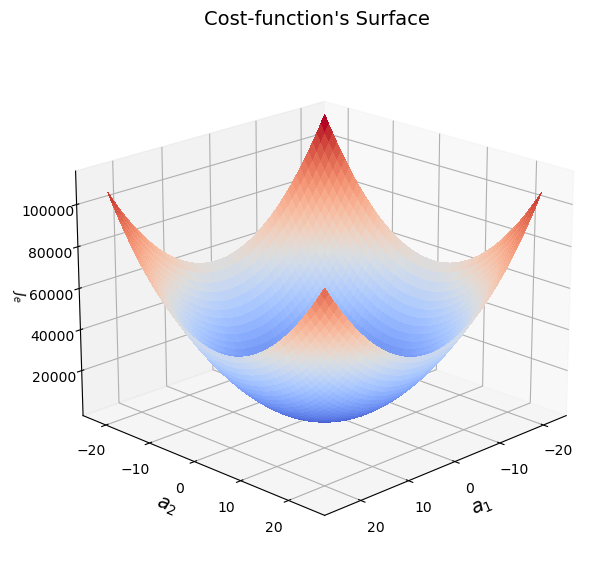

In [ ]:
# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(X, y_noisy)

# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$');
plt.title('Cost-function\'s Surface', fontsize=14)
ax.view_init(20, 45)
#plt.savefig('superficie_de_erro.png', dpi=600)

#Show the plot.
plt.show()

### Encontrando o ponto de mínimo com a equação normal

**OBS**.: Observe que o valor do **MSE é próximo da variância do ruído** adicionado às amostras da função objetivo. Portanto, conforme discutimos anteriormente, o menor valor possível para o MSE será limitado pelo ruído presente nas amostras.

In [ ]:
Joptimum, a_opt = calculateClosedFormSolution(X, y_noisy)

print('a1_opt:', a_opt[0, 0])
print('a2_opt:', a_opt[1, 0])
print('Joptimum:', Joptimum)

a1_opt: 2.0032994113858926
a2_opt: 1.9999704951023085
Joptimum: 99.5225680139118


### Encontrando o ponto de mínimo com o gradiente descendente

In [ ]:
# Gradient-descent solution.
maxNumIter = 10000

# learning step.
alpha = 0.004 # Valor empírico "ideal": convergência rápida.

# Run batch gradient-descent algorithm.
a, a_hist, Jgd, grad_hist, iteration = batchGradientDescent(X, y_noisy, alpha, maxNumIter)

# Print weights and MSE.
print('a1_gd:', a[0, 0])
print('a2_gd:', a[1, 0])
print('Jgd:', Jgd[iteration])

a1_gd: 2.002866098363318
a2_gd: 1.9995127595412803
Jgd: 99.52260706784959


### Plotando a superfície de contorno com o histórico de atualizações dos pesos

A figura mostra as atualizaçoes feitas pelo algoritmo até a convergência, ou seja, até atingir o ponto de mínimo.

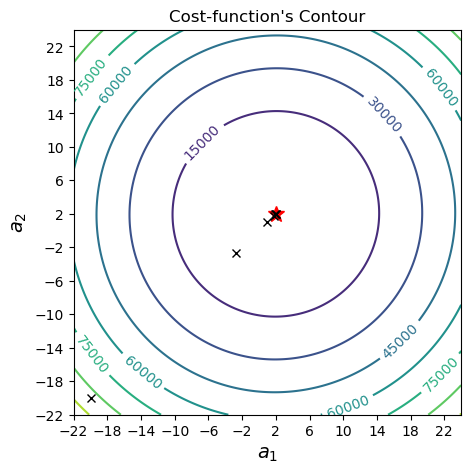

In [ ]:
fig = plt.figure(figsize=(5,5))

cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=12)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')

plt.xticks(np.arange(-22, 24, step=4.0))
plt.yticks(np.arange(-22, 24, step=4.0))

#plt.savefig('superficie_de_contorno.png', dpi=600)

plt.show()

**Observações**

+ O algoritmo segue na direção de máximo decrescimento da superfície de erro, ou seja, como o erro varia de forma similar em ambas as direções, a atualização dos pesos segue um caminho reto entre $a_1$ e $a_2$ (formando $\approx 45^{\circ}$ com os pesos)
+ Vejam que com o passo de aprendizagem ideal, o algoritmo se aproxima do ponto de mínimo em poucos passos (i.e., rapidamente).

### Gráfico com número de iterações versus o erro

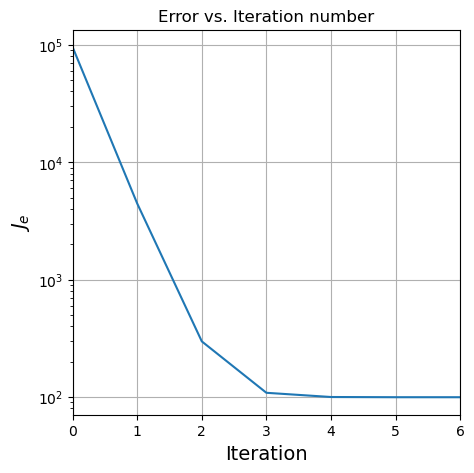

In [ ]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration-1))
plt.yscale('log')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Iteration number')
#plt.savefig('erro_vs_epocas.png', dpi=600)
plt.grid()
plt.show()

### Plotando a função observável juntamente com o hiperplano encontrado com a equação normal e a função objetivo.

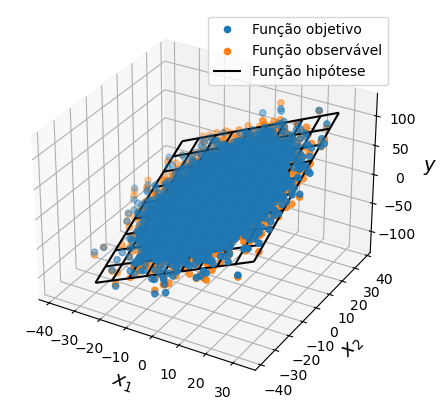

In [ ]:
# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
plt.subplot(projection='3d')
ax = fig.gca()

M = 10
x1_ = np.linspace(-30.0, 30.0, M)
x2_ = np.linspace(-30.0, 30.0, M)
X1, X2 = np.meshgrid(x1_, x2_)
Y = a_opt[0]*X1 + a_opt[1]*X2

ax.scatter(x1, x2, y, label='Função objetivo')
ax.scatter(x1, x2, y_noisy, label='Função observável')
ax.plot_wireframe(X1, X2, Y, color="black", label='Função hipótese')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$y$', fontsize=14)
plt.legend()
plt.show()

### Variação do gradiente

Lembre-se que os pesos $\hat{a}_1$ e $\hat{a}_2$ foram inicializados em -20 e -20, respectivamente.

Portanto, eles estão à **esquerda do valor ótimo** o que vai resultar em **derivadas parciais negativas**.

Assim, o **termo de atualização será positivo** e fará com que o valor dos pesos se torne positivo, tendendo ao valor 2, ao longo das iterações de treinamento.

$$\textbf{a} = \textbf{a} - \frac{\partial J_{e}(\textbf{a})}{\partial \textbf{a}}$$

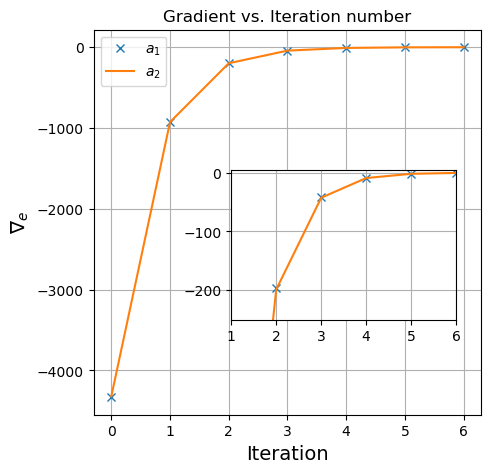

In [ ]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'x', label='$a_1$')
plt.plot(np.arange(0, iteration), grad_hist[1,0:iteration], label='$a_2$')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$\\nabla_e$', fontsize=14)
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.grid()

left, bottom, width, height = [0.4, 0.3, 0.45, 0.3]
ax1 = fig.add_axes([left, bottom, width, height])
ax1.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'x', label='$a_1$')
ax1.plot(np.arange(0, iteration), grad_hist[1,0:iteration], label='$a_2$')
ax1.set_xlim(1, 6)
ax1.set_ylim(-250, 5)
ax1.grid()

plt.show()

### Conclusões

+ Os elementos do vetor gradiente convergem rapidamente para o valor zero, ou seja, o ponto da superfície com inclinação igual a 0 (i.e., o ponto de mínimo da superfície convexa).
+ Após seis iterações, as atualizações aplicadas aos pesos são muito pequenas e, portanto, podemos declarar o término do treinamento.
+ Percebam que as magnitudes dos elementos do vetor gradiente são muito grandes e é por isso que usamos um passo de aprendizagem, para usar apenas uma fração dessa informação e não ultrapassar o ponto de mínimo.